In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf

In [3]:
def plot_function_and_derivative(x, func, derivative):
    
    # setting the axes at the centre
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    ax.plot(x,func(x), color="#d35400", linewidth=3, label=func.__name__)
    ax.plot(x,derivative(x), color="#1abd15", linewidth=3, label=derivative.__name__)
    
    ax.legend(loc="upper left", frameon=False)
    plt.show()

# Binary Step Function

In [5]:
def binary_step(x):
    s_value = 1 / (1 + np.exp(-x))
    return np.round(s_value)

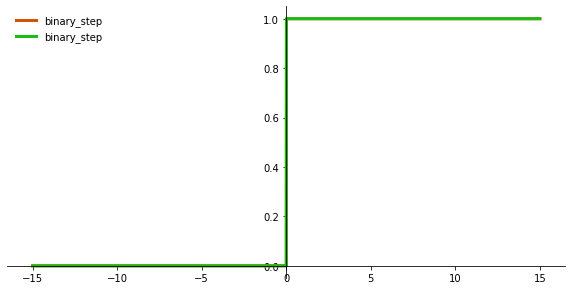

In [7]:
x = np.arange(-15, 15, 0.01)
plot_function_and_derivative(x, binary_step, binary_step)

# tanh

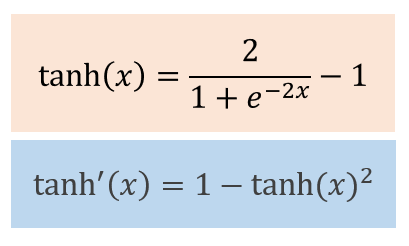

In [3]:
def tanh(x):                                        
    return 2/(1 + np.exp(-2*x)) - 1

def tanh_derivative(x):
    return 1 - tanh(x)**2

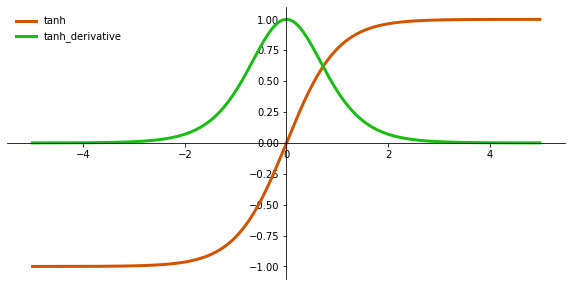

In [4]:
x = np.arange(-5, 5, 0.01)
plot_function_and_derivative(x, tanh, tanh_derivative)

In [17]:
data   = np.array([0.1, -0.2, 0.5])
output = tanh(data)
print(output)

data_d = tanh_derivative(data)
print(data_d)

[ 0.09966799 -0.19737532  0.46211716]
[0.99006629 0.96104298 0.78644773]


In [18]:
activation_layer = keras.activations.tanh
data = tf.Variable(data)
with tf.GradientTape() as tape:
    output = activation_layer(data)
    print(output)
    
data_d = tape.gradient(output, data)
print(data_d)

tf.Tensor([ 0.09966799 -0.19737532  0.46211716], shape=(3,), dtype=float64)
tf.Tensor([0.99006629 0.96104298 0.78644773], shape=(3,), dtype=float64)


# sigmoid

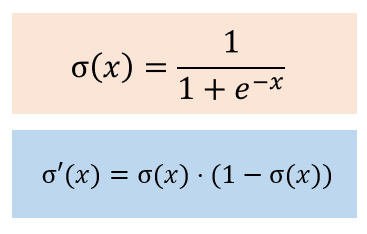

In [20]:
def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    y = sigmoid(x)
    return y*(1-y)

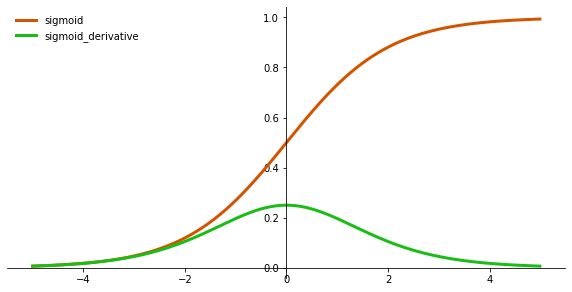

In [21]:
x = np.arange(-5, 5, 0.01)
plot_function_and_derivative(x, sigmoid, sigmoid_derivative)

In [22]:
data   = np.array([0.1, -0.2, 0.5])
output = sigmoid(data)
print(output)

data_d = sigmoid_derivative(data)
print(data_d)

[0.52497919 0.450166   0.62245933]
[0.24937604 0.24751657 0.23500371]


In [23]:
activation_layer = keras.activations.sigmoid
data = tf.Variable(data)
with tf.GradientTape() as tape:
    output = activation_layer(data)
    print(output)
    
data_d = tape.gradient(output, data)
print(data_d)

tf.Tensor([0.52497919 0.450166   0.62245933], shape=(3,), dtype=float64)
tf.Tensor([0.24937604 0.24751657 0.23500371], shape=(3,), dtype=float64)


# relu

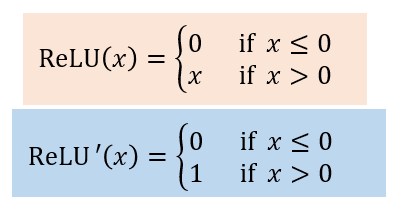

In [25]:
def relu(x):                                        
    return x*(x>0)

def relu_derivative(x):
    return 1*(x>0)

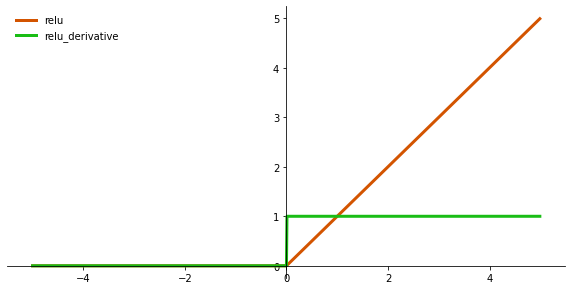

In [26]:
x = np.arange(-5, 5, 0.01)
plot_function_and_derivative(x, relu, relu_derivative)

In [29]:
data   = np.array([0.1, -0.2, 0.5])
output = relu(data)
print(output)

data_d = relu_derivative(data)
print(data_d)

[ 0.1 -0.   0.5]
[1 0 1]


In [30]:
activation_layer = keras.activations.relu
data = tf.Variable(data)
with tf.GradientTape() as tape:
    output = activation_layer(data)
    print(output.numpy())
    
data_d = tape.gradient(output, data)
print(data_d.numpy())

[0.1 0.  0.5]
[1. 0. 1.]


# prelu

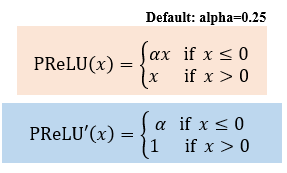

In [31]:
def prelu(x, alpha=0.25):                                        
    return x*alpha*(x<=0) + x*(x>0)

def prelu_derivative(x, alpha=0.25):
    return alpha*(x<=0) + 1*(x>0)

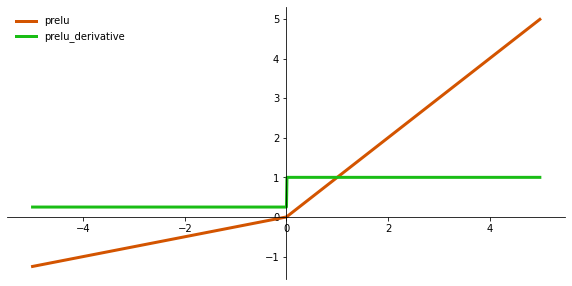

In [32]:
x = np.arange(-5, 5, 0.01)
plot_function_and_derivative(x, prelu, prelu_derivative)

In [55]:
data   = np.array([0.1, -0.2, 0.5])
output = prelu(data)
print(output)

data_d = prelu_derivative(data)
print(data_d)

[ 0.1  -0.05  0.5 ]
[1.   0.25 1.  ]


In [56]:
activation_layer = tf.keras.layers.PReLU(alpha_initializer=keras.initializers.Constant(value=0.25))
data = tf.Variable(data.reshape(1, -1), dtype=tf.float32)
with tf.GradientTape() as tape:
    output = activation_layer(data)
    print(output.numpy())
    
data_d = tape.gradient(output, data)
print(data_d.numpy())

[[0.1 0.  0.5]]
[[1. 0. 1.]]


# LeakyReLU

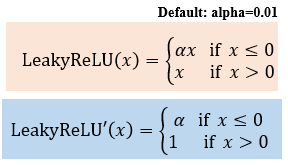

In [11]:
def leakyrelu(x):                                        
    return x*0.01*(x<=0) + x*(x>0)

def leakyrelu_derivative(x):
    return 0.01*(x<=0) + 1*(x>0)

In [13]:
data   = np.array([1, 5, -4, 3, -2])
output = leakyrelu(data)
print(output)

data_d = leakyrelu_derivative(data)
print(data_d)

[ 1.    5.   -0.04  3.   -0.02]
[1.   1.   0.01 1.   0.01]


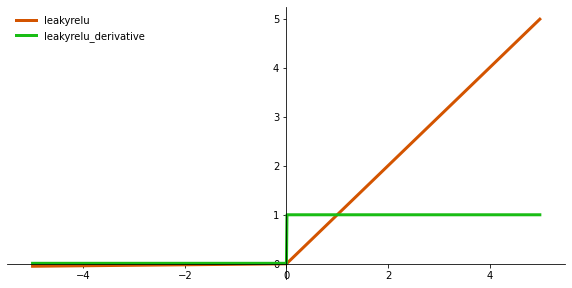

In [36]:
x = np.arange(-5, 5, 0.01)
plot_function_and_derivative(x, leakyrelu, leakyrelu_derivative)

In [40]:
data   = np.array([0.1, -0.2, 0.5])
output = leakyrelu(data)
print(output)

data_d = leakyrelu_derivative(data)
print(data_d)

[ 0.1   -0.002  0.5  ]
[1.   0.01 1.  ]


In [41]:
activation_layer = tf.keras.layers.LeakyReLU(0.01)
data = tf.Variable(data.reshape(1, -1))
with tf.GradientTape() as tape:
    output = activation_layer(data)
    print(output.numpy())
    
data_d = tape.gradient(output, data)
print(data_d.numpy())

[[ 0.1   -0.002  0.5  ]]
[[1.   0.01 1.  ]]


# elu

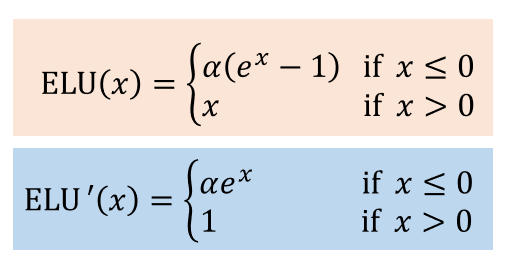

In [7]:
def elu(x, alpha=1.0):                                        
    return alpha*(np.exp(x)-1)*(x<0) + x*(x>=0)

def elu_derivative(x, alpha=1.0):
    return alpha*np.exp(x)*(x<0) + 1*(x>=0)

In [10]:
data   = np.array([1, 5, -4, 3, -2])
output = elu(data, 0.1)
print(output)

data_d = elu_derivative(data, 0.1)
print(data_d)

[ 1.          5.         -0.09816844  3.         -0.08646647]
[1.         1.         0.00183156 1.         0.01353353]


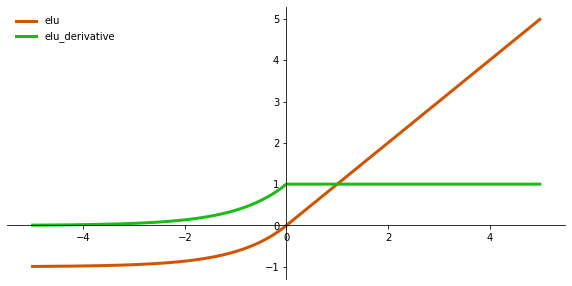

In [58]:
x = np.arange(-5, 5, 0.01)
plot_function_and_derivative(x, elu, elu_derivative)

In [63]:
data   = np.array([0.1, -0.2, 0.5])
output = elu(data, 0.01)
print(output)

data_d = elu_derivative(data, 0.01)
print(data_d)

[ 0.1        -0.00181269  0.5       ]
[1.         0.00818731 1.        ]


In [64]:
activation_layer = tf.keras.layers.ELU(0.01)
data = tf.Variable(data.reshape(1, -1))
with tf.GradientTape() as tape:
    output = activation_layer(data)
    print(output.numpy())
    
data_d = tape.gradient(output, data)
print(data_d.numpy())

[[ 0.1        -0.00181269  0.5       ]]
[[1.         0.00818731 1.        ]]


# softplus

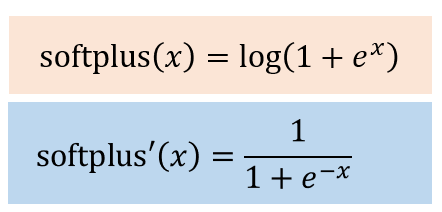

In [65]:
def softplus(x):                                        
    return np.log(1 + np.exp(x))

def softplus_derivative(x):
    return 1/(1 + np.exp(-x))

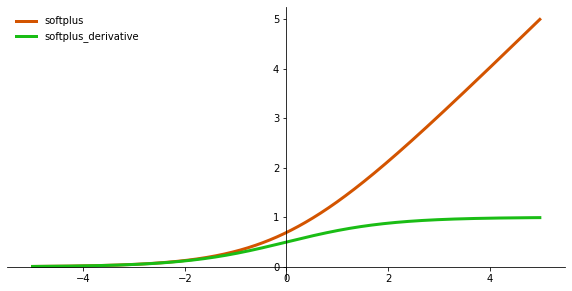

In [66]:
x = np.arange(-5, 5, 0.01)
plot_function_and_derivative(x, softplus, softplus_derivative)

In [67]:
data   = np.array([0.1, -0.2, 0.5])
output = softplus(data)
print(output)

data_d = softplus_derivative(data)
print(data_d)

[0.74439666 0.59813887 0.97407698]
[0.52497919 0.450166   0.62245933]


In [68]:
activation_layer = tf.keras.activations.softplus
data = tf.Variable(data)
with tf.GradientTape() as tape:
    output = activation_layer(data)
    print(output.numpy())
    
data_d = tape.gradient(output, data)
print(data_d.numpy())

[0.74439666 0.59813887 0.97407698]
[0.52497919 0.450166   0.62245933]


# exponential

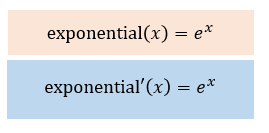

In [28]:
def exponential(x):                                        
    return np.exp(x)

def exponential_derivative(x):
    return np.exp(x)

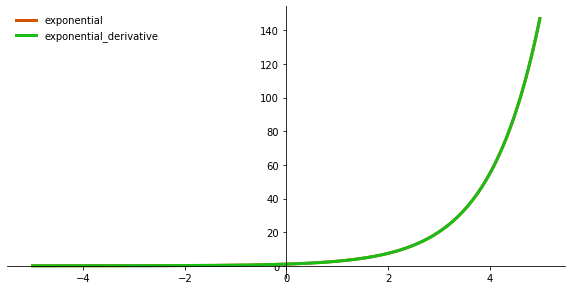

In [29]:
x = np.arange(-5, 5, 0.01)
plot_function_and_derivative(x, exponential, exponential_derivative)

# selu

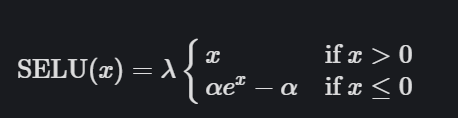
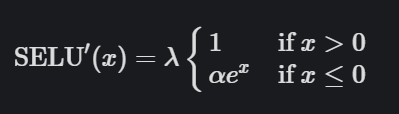
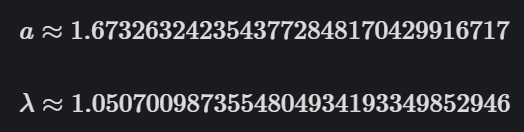

In [70]:
def selu(x, lamda=1.05, alpha=1.67):                                        
    return lamda*( x*(x>0) + (alpha * np.exp(x) - alpha)*(x<=0) )

def selu_derivative(x, lamda=1.05, alpha=1.67):
    return lamda*( 1*(x>0) + (alpha * np.exp(x))*(x<=0) )

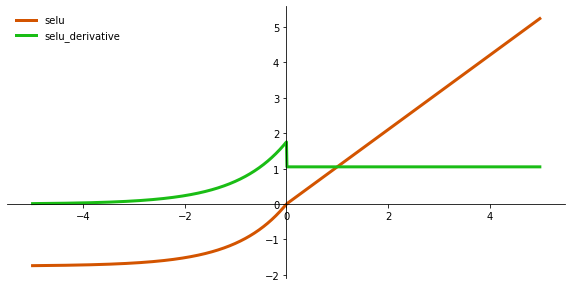

In [71]:
x = np.arange(-5, 5, 0.01)
plot_function_and_derivative(x, selu, selu_derivative)

In [72]:
data   = np.array([0.1, -0.2, 0.5])
output = selu(data)
print(output)

data_d = selu_derivative(data)
print(data_d)

[ 0.105      -0.31785562  0.525     ]
[1.05       1.43564438 1.05      ]


In [73]:
activation_layer = tf.keras.activations.selu
data = tf.Variable(data)
with tf.GradientTape() as tape:
    output = activation_layer(data)
    print(output.numpy())
    
data_d = tape.gradient(output, data)
print(data_d.numpy())

[ 0.1050701  -0.31868934  0.52535049]
[1.05070099 1.43941    1.05070099]


# gelu

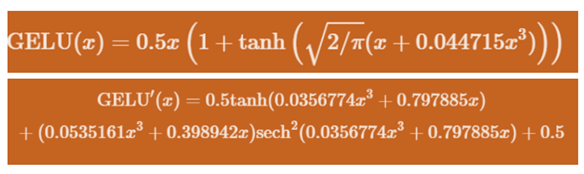

In [74]:
def gelu(x):                                        
    return 0.5*x*(1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715*(x**3))))

def gelu_derivative(x):
    sech = (1/np.cosh(0.035674*(x*3)+0.797885*x))**2
    return 0.5*np.tanh(0.0356774*(x**3) + 0.797885*x) + (0.00535*(x**3)+0.3989*x)*sech + 0.5

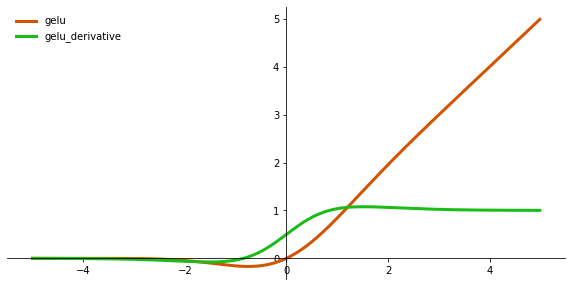

In [75]:
x = np.arange(-5, 5, 0.01)
plot_function_and_derivative(x, gelu, gelu_derivative)

In [78]:
data   = np.array([0.1, -0.2, 0.5])
output = gelu(data)
print(output)

data_d = gelu_derivative(data)
print(data_d)

[ 0.05398275 -0.08414857  0.34571401]
[0.57939797 0.3434785  0.85558496]


In [79]:
activation_layer = tf.keras.activations.gelu
data = tf.Variable(data)
with tf.GradientTape() as tape:
    output = activation_layer(data)
    print(output.numpy())
    
data_d = tape.gradient(output, data)
print(data_d.numpy())

[ 0.05398278 -0.08414806  0.34573123]
[0.57952309 0.34253175 0.86749513]


# hard_sigmoid

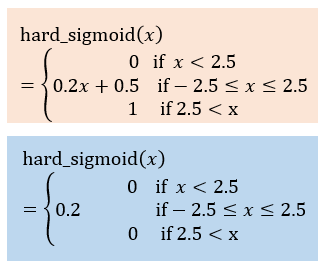

In [91]:
def hard_sigmoid(x):    
    return (x < -2.5)*0 + (x > -2.5)*1 + (-2.5 <= x)*(x <= 2.5)*(0.2 * x + 0.5)

def hard_sigmoid_derivative(x):
    return (x < -2.5)*0 + (x > -2.5)*0 + (-2.5 <= x)*(x <= 2.5)*0.2

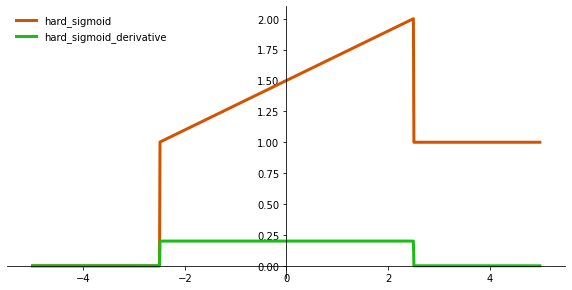

In [92]:
x = np.arange(-5, 5, 0.01)
plot_function_and_derivative(x, hard_sigmoid, hard_sigmoid_derivative)

In [93]:
data   = np.array([0.1, -0.2, 0.5])
output = hard_sigmoid(data)
print(output)

data_d = hard_sigmoid_derivative(data)
print(data_d)

[1.52 1.46 1.6 ]
[0.2 0.2 0.2]


In [94]:
activation_layer = tf.keras.activations.hard_sigmoid
data = tf.Variable(data)
with tf.GradientTape() as tape:
    output = activation_layer(data)
    print(output.numpy())
    
data_d = tape.gradient(output, data)
print(data_d.numpy())

[0.52 0.46 0.6 ]
[0.2 0.2 0.2]


# swish

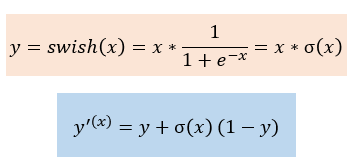

In [1]:
def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x))

def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

def swish_derivative(x):
    y = swish(x)
    return y + sigmoid(x) * (1-y)

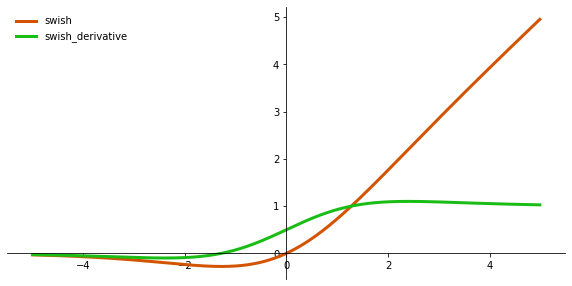

In [81]:
x = np.arange(-5, 5, 0.01)
plot_function_and_derivative(x, swish, swish_derivative)

In [5]:
data   = np.array([1, 5, -4, 3, -2])
output = swish(data)
print(output)

data_d = swish_derivative(data)
print(data_d)

[ 0.73105858  4.96653575 -0.07194484  2.85772238 -0.23840584]
[ 0.92767051  1.02654743 -0.05266461  1.08810411 -0.09078425]


In [82]:
data   = np.array([0.1, -0.2, 0.5])
output = swish(data)
print(output)

data_d = swish_derivative(data)
print(data_d)

[ 0.05249792 -0.0900332   0.31122967]
[0.54991679 0.40066269 0.73996119]


In [83]:
activation_layer = tf.keras.activations.swish
data = tf.Variable(data)
with tf.GradientTape() as tape:
    output = activation_layer(data)
    print(output.numpy())
    
data_d = tape.gradient(output, data)
print(data_d.numpy())

[ 0.05249792 -0.0900332   0.31122967]
[0.54991679 0.40066269 0.73996119]
